# EDA on Titanic Dataset

## Plan Of Action.
- Do high level analysis like shape, data types and statistical analysis
- Analyze missing value and handle them
- Create some meaningful features
- Dive deeper into Visulaization by Analyzing using Univariate Analysis
- Then Dive deeper into Bivariate Analysis finding out the relationship between two or more columns

### Importing the necessary dependencies

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Loading the dataset from seaborn as DataFrame.

In [42]:
df = sns.load_dataset('titanic')

### Visualizing the top 5 rows

In [43]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Checking out the shape of our data

In [44]:
df.shape

(891, 15)

- we have 891 samples and 15 features in our data.

### Checking out the data types of our data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Analyzing the statistics of Numerical Columns

In [46]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking Missing Values And Handling Them

In [47]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- Dropping deck column because it has too many missing values

In [48]:
df.drop(['deck'], axis=1, inplace=True)

In [49]:
df['age'] = df['age'].fillna(df['age'].median())

In [56]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [57]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [58]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

All Missing value handled

# Feature Engineering

### Creating one column with combining sibsp and parch

In [60]:
df['family'] = df['sibsp'] + df['parch']

In [61]:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

also dropping embark_town because it is a duplicate of embarked

In [62]:
df.drop(['embark_town'], axis=1, inplace=True)

also dropping class because it is a duplicate of pclass

In [65]:
df.drop(['class'], axis=1, inplace=True)

# Univariate Analysis

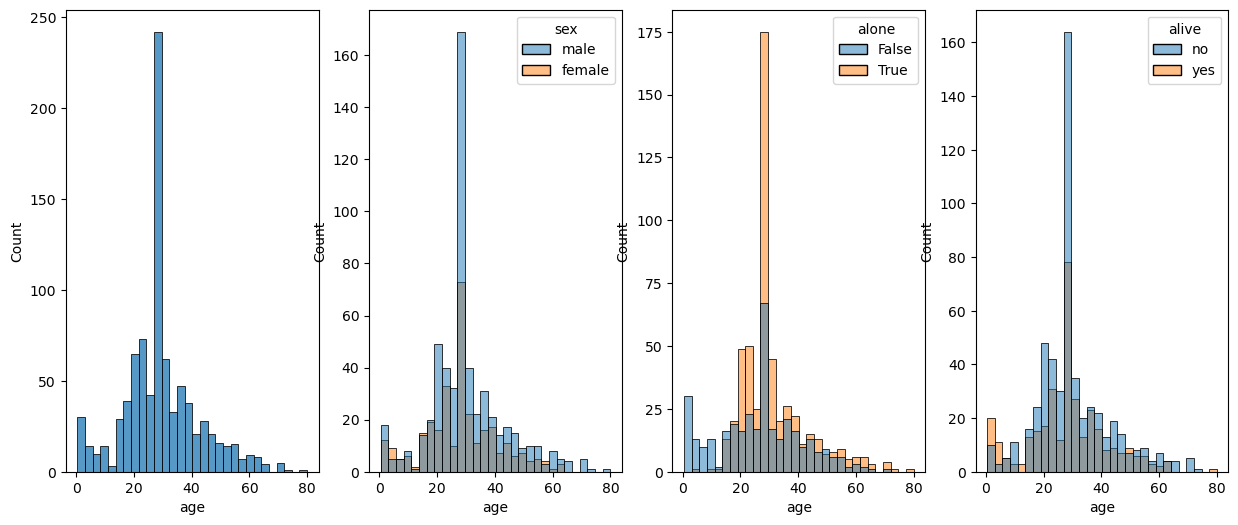

In [77]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.histplot(data=df, x='age')

plt.subplot(1,4,2)
sns.histplot(data=df, x='age', hue='sex')

plt.subplot(1,4,3)
sns.histplot(data=df, x='age', hue='alone')

plt.subplot(1,4,4)
sns.histplot(data=df, x='age', hue='alive')

plt.show()

In [125]:
df.head()

,survived,pclass,sex,age,fare,embarked,who,adult_male,alive,alone,family
0,0,3,male,22.0,7.2500,S,man,True,no,False,1
1,1,1,female,38.0,71.2833,C,woman,False,yes,False,1
2,1,3,female,26.0,7.9250,S,woman,False,yes,True,0
3,1,1,female,35.0,53.1000,S,woman,False,yes,False,1
4,0,3,male,35.0,8.0500,S,man,True,no,True,0


### Visualizing the Fair distribution based on Sex, Pclass and Embarked

Text(0.5, 1.0, 'Fare -vs- embarked')

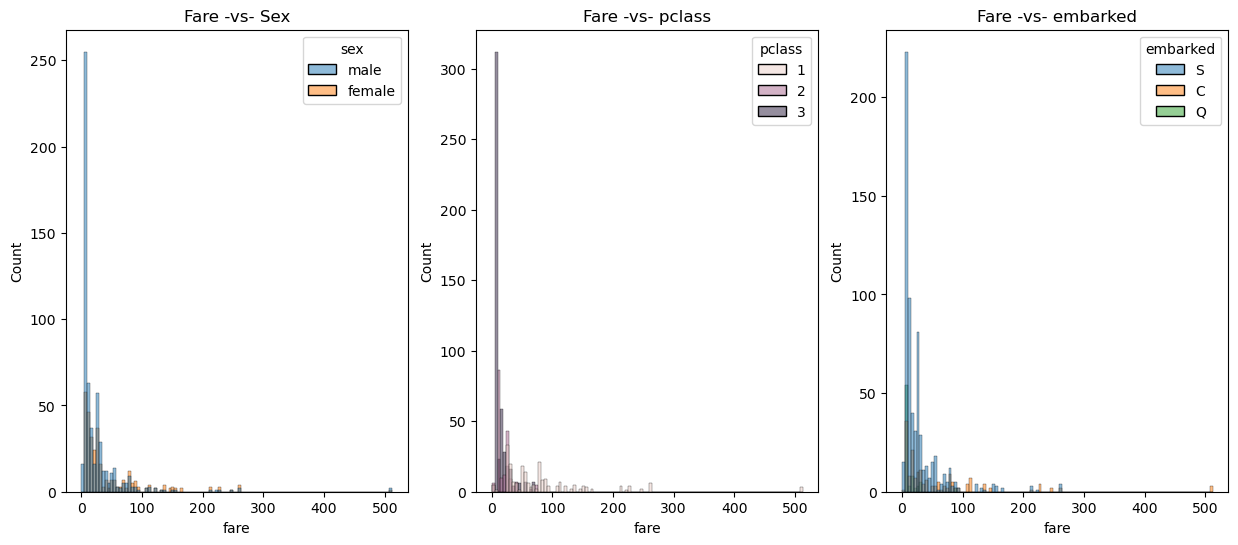

In [126]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='fare', hue='sex')
plt.title('Fare -vs- Sex')

plt.subplot(1,3,2)
sns.histplot(data=df, x='fare', hue='pclass')
plt.title('Fare -vs- pclass')

plt.subplot(1,3,3)
sns.histplot(data=df, x='fare', hue='embarked')
plt.title('Fare -vs- embarked')

### Insights
- Majority of the people in is 30 age group

### Visualizing the quantity of gender

<Axes: ylabel='count'>

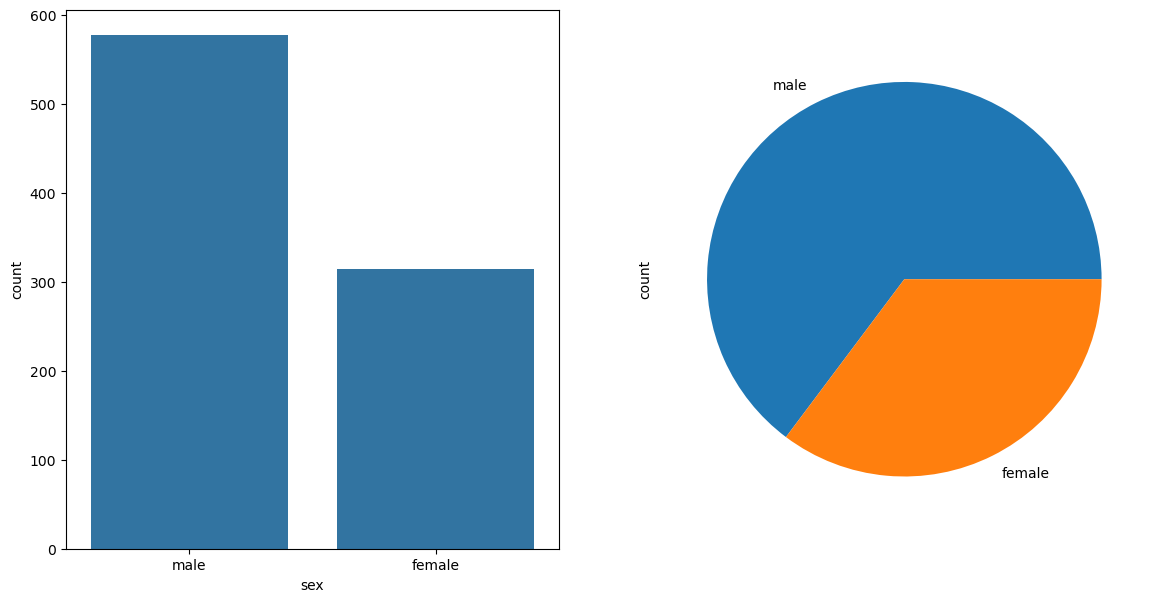

In [89]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='sex')

plt.subplot(1,2,2)
df['sex'].value_counts().plot(kind='pie')

### Insights
- Most of the people in ship are Males

<Axes: xlabel='sex', ylabel='count'>

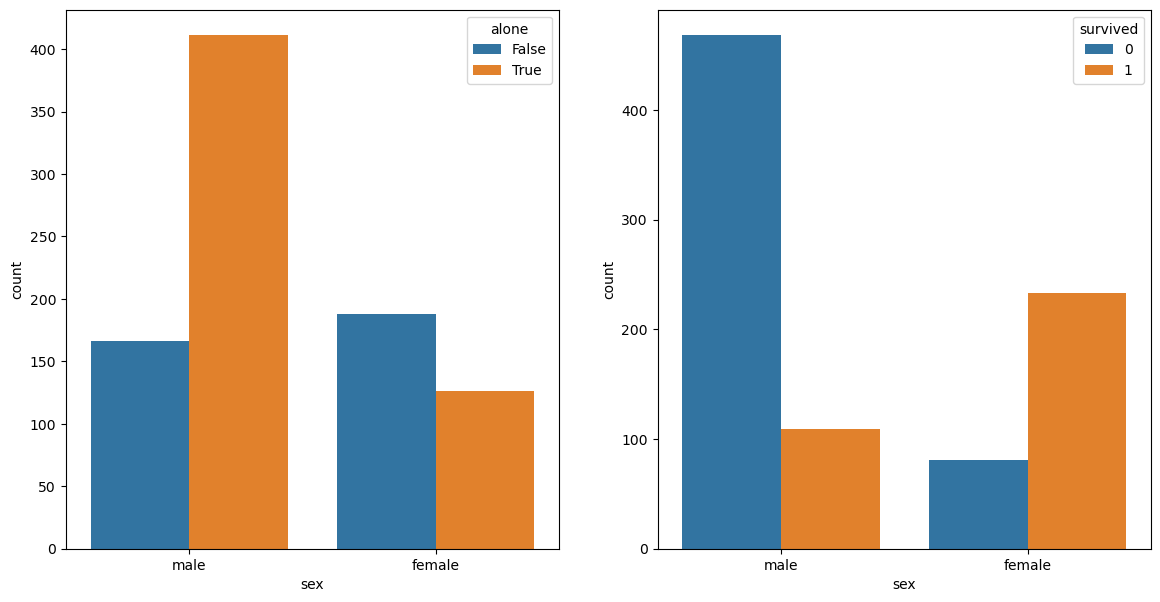

In [92]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='sex', hue='alone')

plt.subplot(1,2,2)
sns.countplot(data=df, x='sex', hue='survived')

### Insights
- Most of the people on ship are Males who come alone and Females come with family
- The people who mostly dies are Males and Majority of the Females Survived

<Axes: ylabel='count'>

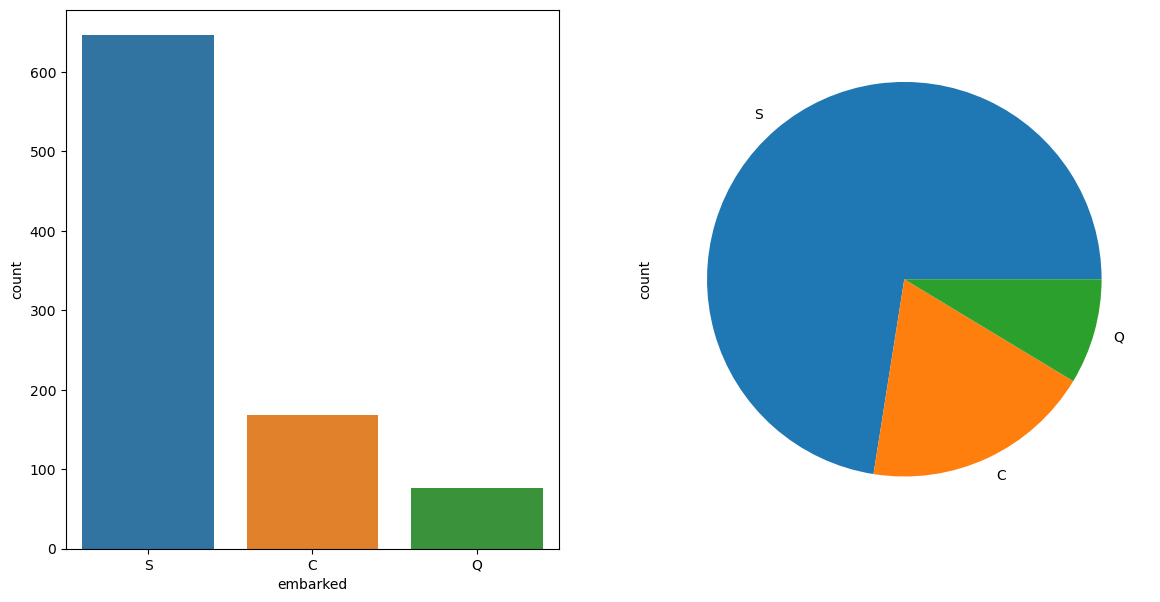

In [97]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='embarked', hue='embarked')

plt.subplot(1,2,2)
df['embarked'].value_counts().plot(kind='pie')

### Insights 
- Majority of the people in the ship comes from Southampton

<Axes: xlabel='embarked', ylabel='count'>

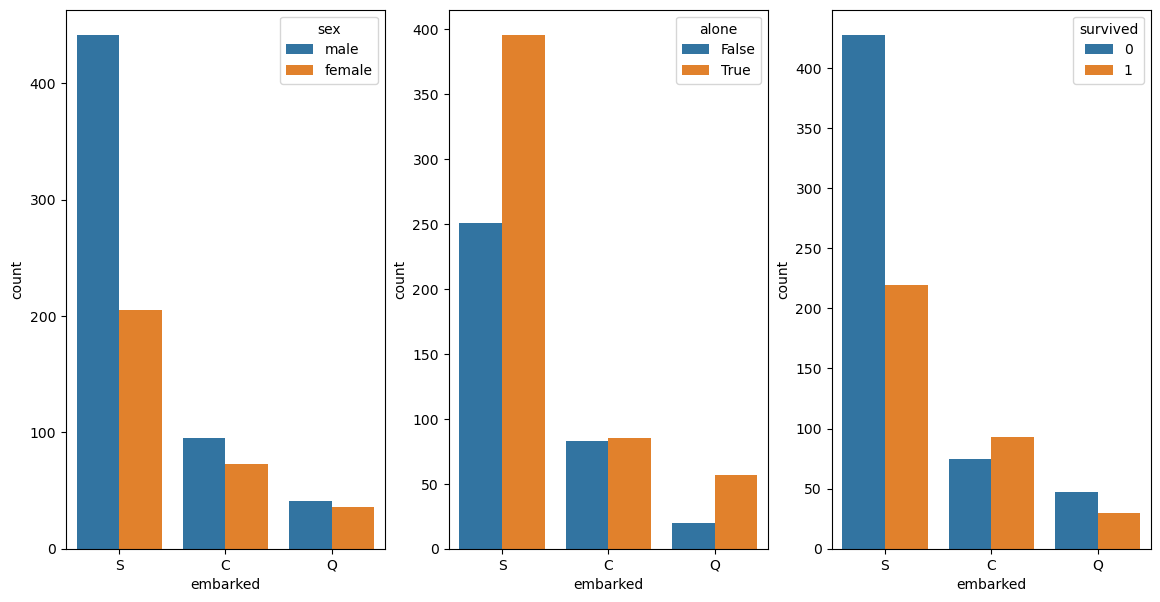

In [101]:
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
sns.countplot(data=df, x='embarked', hue='sex')

plt.subplot(1,3,2)
sns.countplot(data=df, x='embarked', hue='alone')

plt.subplot(1,3,3)
sns.countplot(data=df, x='embarked', hue='survived')

### Insights
- Males and Females quantity are same in Cenborg and Queenstown but from Southhambton Males are most frequent
- People mostly come alone from Southhambton and Queenstown
- People mostly not survived but people from Southhambton are most likely to not survive

### Visualizing males who comes from S, C, Q based on survived and alone

<Axes: xlabel='embarked', ylabel='count'>

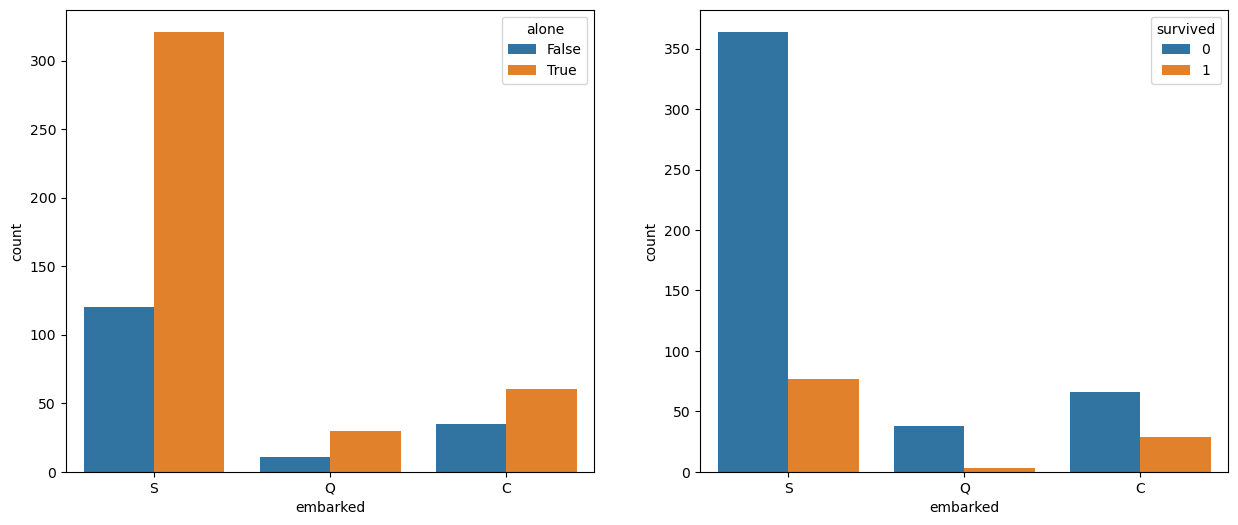

In [105]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=df[df['sex'] == 'male'], x='embarked', hue='alone')

plt.subplot(1,2,2)
sns.countplot(data=df[df['sex'] == 'male'], x='embarked', hue='survived')

### Insights
- Most of the males come alone from all embarked
- Most of the males not survived in all embarked

### Visualizing Females who comes from S, C, Q based on survived and alone

<Axes: xlabel='embarked', ylabel='count'>

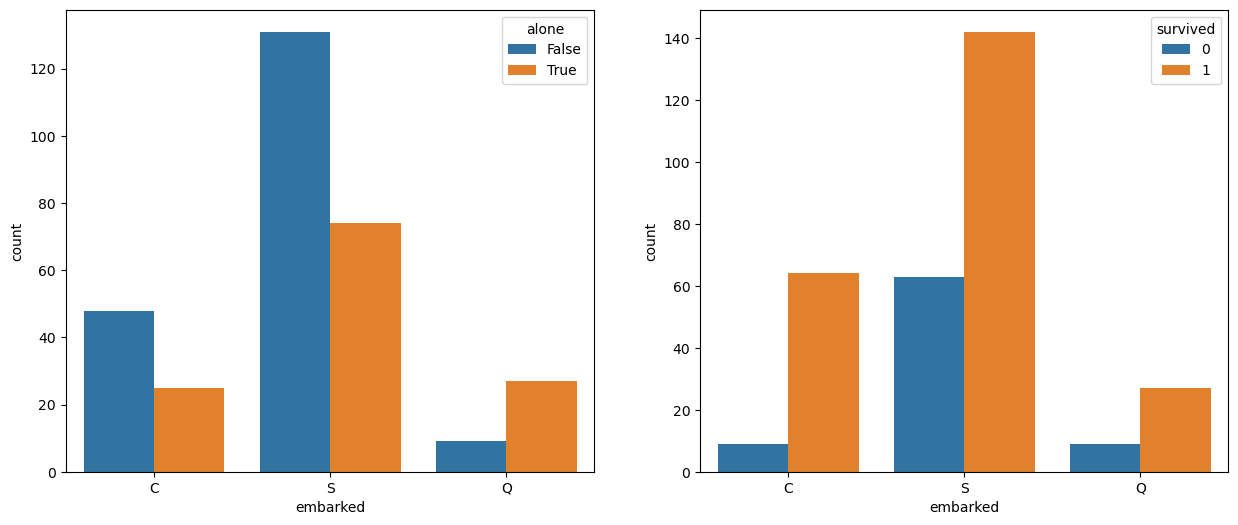

In [107]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=df[df['sex'] == 'female'], x='embarked', hue='alone')

plt.subplot(1,2,2)
sns.countplot(data=df[df['sex'] == 'female'], x='embarked', hue='survived')

### Insights
- Females from Queenstown comes mostly alone but from Southambton and Chenborgh they come with family
- Females Mostly survived but in Southambton some females not survived

### Visalizing Passenger Class counts

<Axes: ylabel='count'>

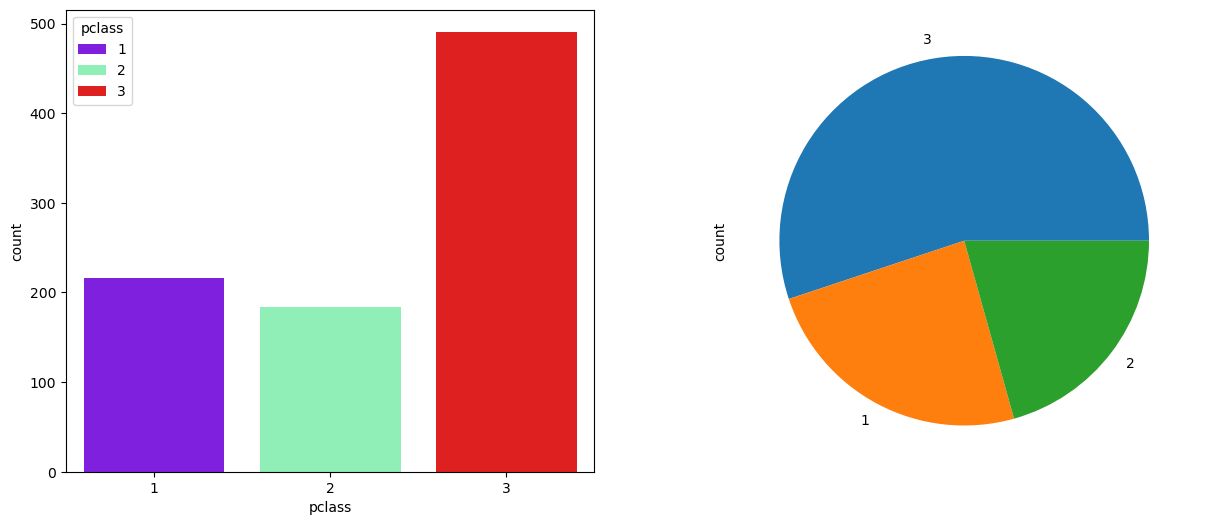

In [113]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='pclass', hue='pclass', palette='rainbow')

plt.subplot(1,2,2)
df['pclass'].value_counts().plot(kind='pie')

### Insights
- Most of the people are from Third Class Cabins
- Quantity of people from First and Second Class Cabins are almost same

### Visalizing the PClass based on Sex, Embarked, Alone and Survived

Text(0.5, 1.0, 'pclass -vs- survived')

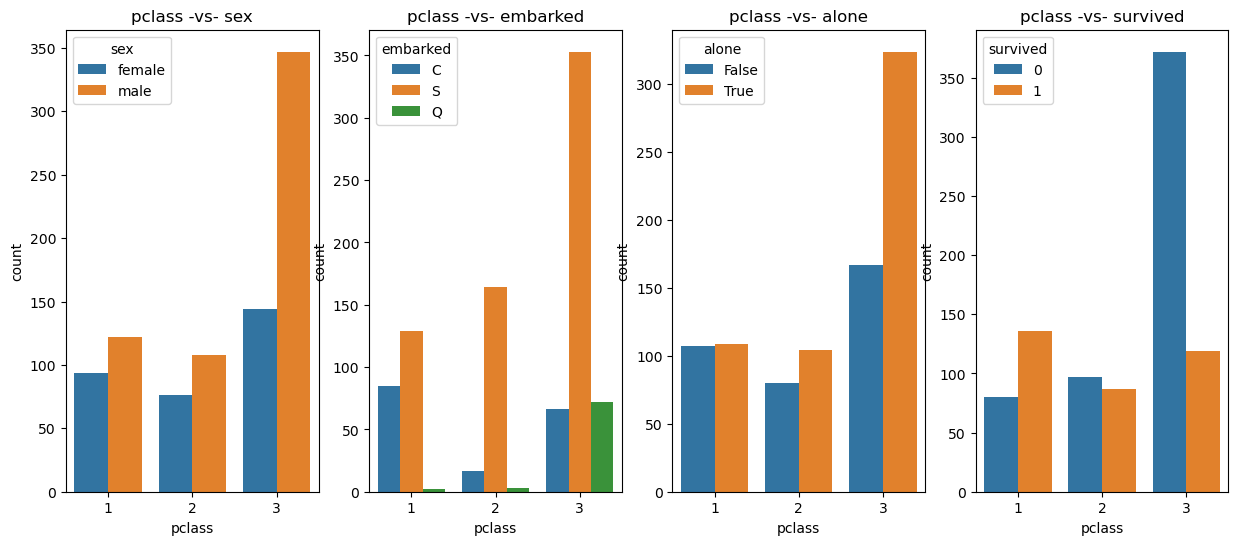

In [115]:
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
sns.countplot(data=df, x='pclass', hue='sex')
plt.title('pclass -vs- sex')

plt.subplot(1,4,2)
sns.countplot(data=df, x='pclass', hue='embarked')
plt.title('pclass -vs- embarked')

plt.subplot(1,4,3)
sns.countplot(data=df, x='pclass', hue='alone')
plt.title('pclass -vs- alone')

plt.subplot(1,4,4)
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('pclass -vs- survived')

### Insights
- From First and Second Class males and females are almost same but on Third Class Males are more frequent.
- Mostly peoples from all Class comes from south hambton.
- From First and Second Class people may are also Alone and with family but in Third Class people are mostly alone.
- Mostly peoples who have taken First class have survived in comparision to Second and Third Class who have mostly not survived.

<Axes: ylabel='count'>

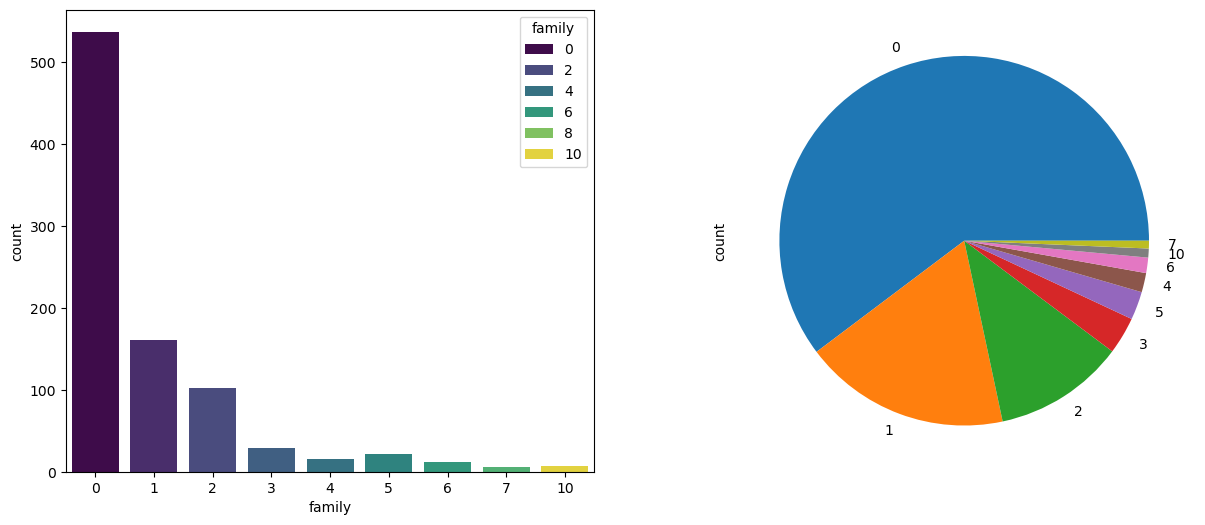

In [120]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='family', hue='family', palette='viridis')

plt.subplot(1,2,2)
df['family'].value_counts().plot(kind='pie')

### Insights
- Most of the people come alone and people also come with 10 family members but not frequent enough.

# Mutlivariate Analysis

### Visualizing the pairplot of our data

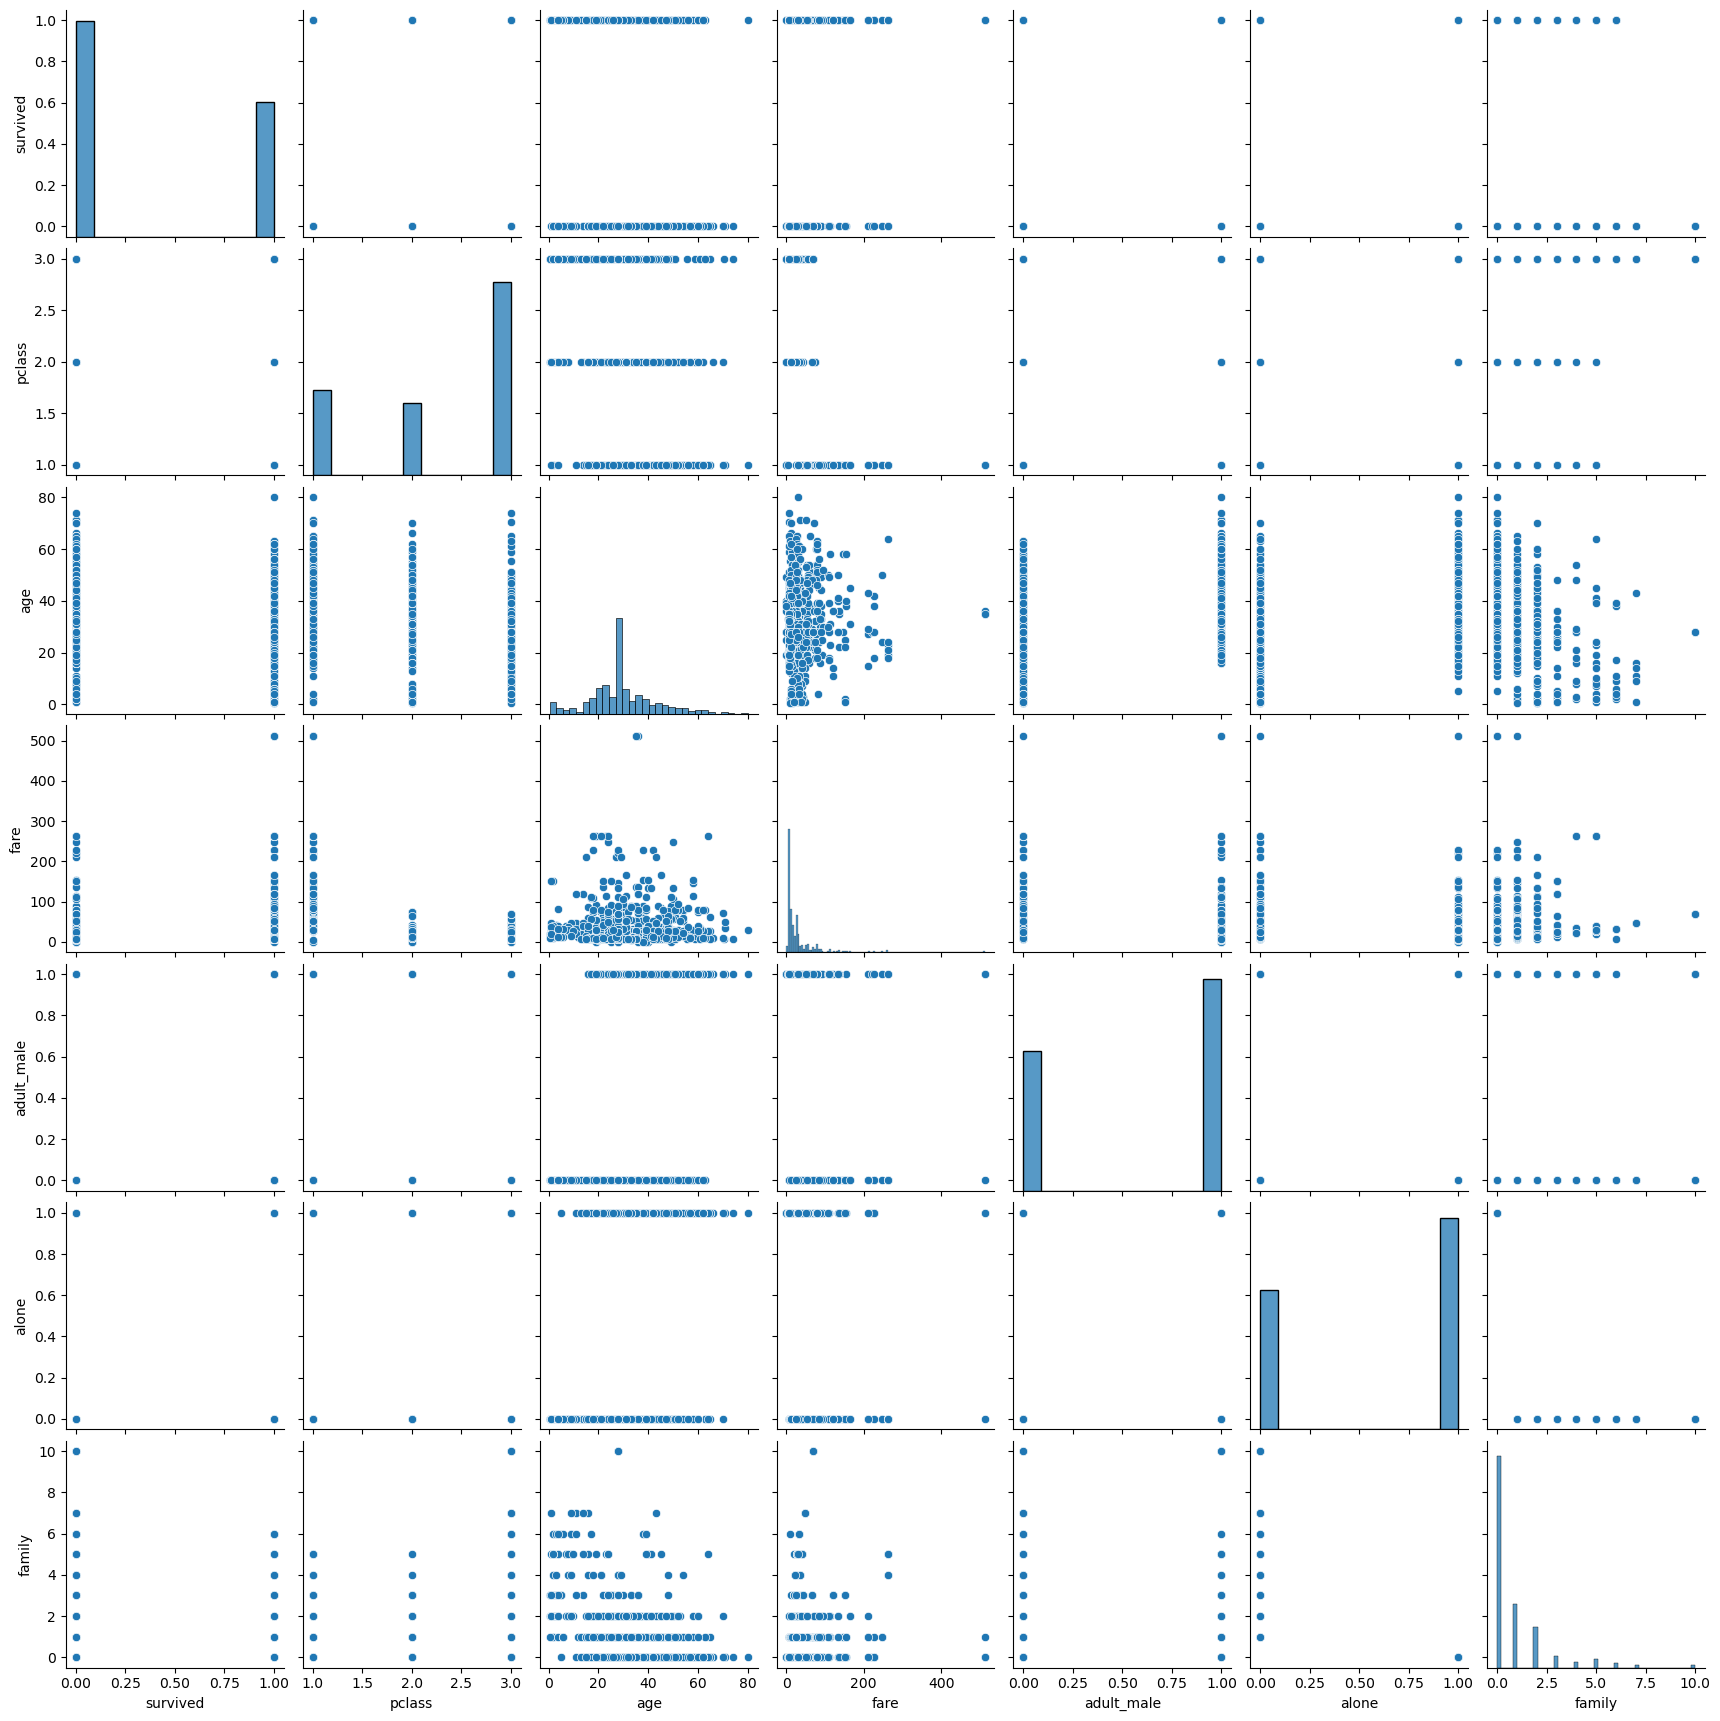

In [122]:
sns.pairplot(df)

### Visualizing the correlation of our numerical columns

<Axes: >

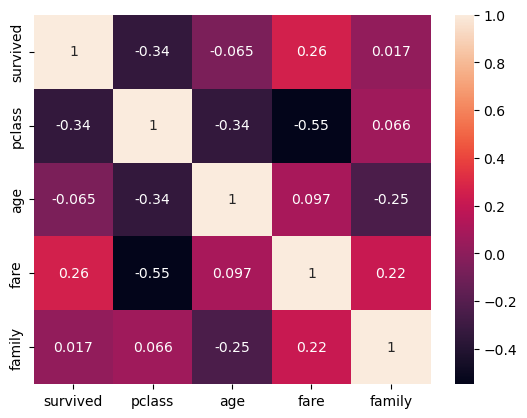

In [124]:
sns.heatmap(df[df.select_dtypes('number').columns].corr(), annot=True)

### Finding the relation between Age and Fare

<Axes: xlabel='age', ylabel='fare'>

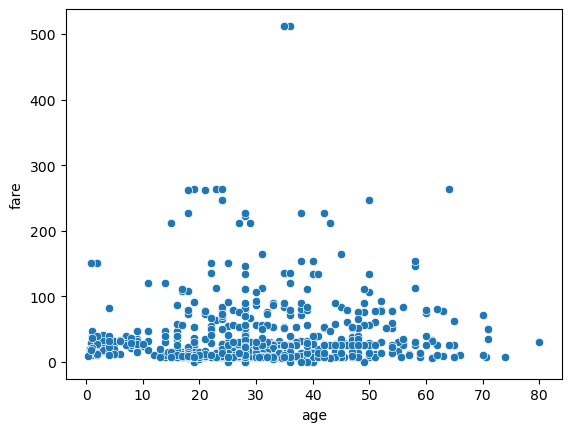

In [128]:
sns.scatterplot(data=df, x='age', y='fare')

### Insights
- Age does not matter fare is same for each age group

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_8072\2260629970.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


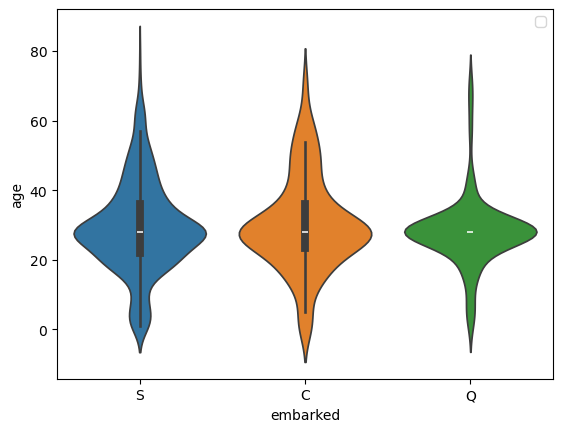

In [132]:
sns.violinplot(data=df, x='embarked', y='age', hue='embarked')

# EDA Completed For now at Titanic dataset